In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [1]:
#Import all Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [6]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [7]:
df = pd.read_csv(file_name)

## Question1

#### Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [8]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## Question 2
#### Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot and submit it. 

In [9]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [11]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [12]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [13]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Question 3
#### Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame. Take a screenshot of your code and output and submit it.

In [14]:
sr = df['floors'].value_counts().to_frame()
print(sr)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

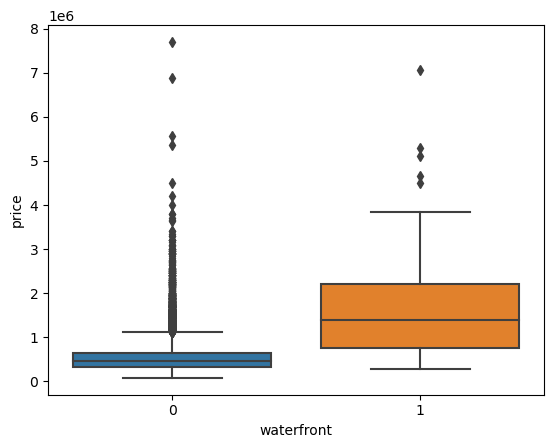

In [16]:
sns.boxplot(x=df['waterfront'], y=df['price'])

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0.0, 8081250.0)

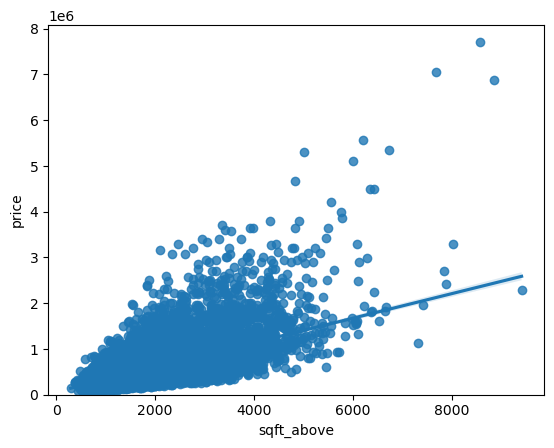

In [17]:
sns.regplot(x='sqft_above', y='price',data=df)
plt.ylim(0,)

In [18]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [19]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
lm2 = LinearRegression()
lm2
lm2.fit(X,Y)
lm2.score(X, Y)

0.6576951666037498

## Question 8

Use the list to create a pipeline object, predict the 'price', fit the object using the features in the list features , then fit the model and calculate the R^2

In [22]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.751339641572321

## Question 9

Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [26]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [27]:
from sklearn.linear_model import Ridge

In [28]:
Rig = Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

0.647875916393911

## Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [29]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
rig.score(x_test_pf,y_test)

0.7002744261580325